# House Price Prediction


**Yash Midha - 22BDS0440** and **Santosh Acharya - 22BDS0441**

Tech stack used:-
1. SQL - for storing and retrieving data
2. Python - for data pre-processing and analysis
3. Flask - for web api

## Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mysql.connector
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pickle

## Importing data with SQL

In [2]:
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="yash",
    database="foundation"
)

dataset = pd.read_sql("SELECT * FROM HousingPrices", conn)
conn.close()

# dataset = pd.read_csv('Data.csv')

C:\Users\YASHMI~1\AppData\Local\Temp/ipykernel_17876/2506743887.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dataset = pd.read_sql("SELECT * FROM HousingPrices", conn)


In [3]:
print(dataset.iloc[0])

id                               6.762810e+09
Date                             4.265500e+04
num_bedrooms                     6.000000e+00
num_bathrooms                    8.000000e+00
living_area                      1.205000e+04
lot_area                         2.760000e+04
num_floors                       2.500000e+00
waterfront_present               0.000000e+00
num_views                        3.000000e+00
house_condition                  4.000000e+00
house_grade                      1.300000e+01
house_area_excluding_basement    8.570000e+03
basement_area                    3.480000e+03
built_year                       1.910000e+03
renovation_year                  1.987000e+03
postal_code                      1.220130e+05
latitude                         5.285980e+01
longitude                       -1.145130e+02
living_area_renov                3.940000e+03
lot_area_renov                   8.800000e+03
num_schools_nearby               1.000000e+00
distance_from_airport            5

In [4]:
dataset.head()

id   Date  num_bedrooms  num_bathrooms  living_area  lot_area  \
0  6762810020  42655             6           8.00        12050     27600   
1  6762810021  42531             5           4.50        10040     37325   
2  6762810022  42631             6           7.75         9890     31374   
3  6762810023  42585             5           5.75         9200     35069   
4  6762810026  42662             5           5.25         8010     45517   

   num_floors  waterfront_present  num_views  house_condition  ...  \
0         2.5                   0          3                4  ...   
1         2.0                   1          2                3  ...   
2         2.0                   0          4                3  ...   
3         2.0                   0          0                3  ...   
4         2.0                   1          4                3  ...   

   built_year  renovation_year  postal_code  latitude  longitude  \
0        1910             1987       122013   52.8598   -114.513   
1        1940             2001       122048   52.8800   -114.404   
2        2001                0       122071   52.8605   -114.430   
3        2001                0       122071   52.8589   -114.423   
4        1999                0       122010   52.9067   -114.401   

   living_area_renov  lot_area_renov  num_schools_nearby  \
0               3940            8800                   1   
1               3930           25449                   3   
2               4540           42730                   2   
3               3560           24345                   1   
4               3430           26788                   2   

   distance_from_airport    price  
0                     50  7700000  
1                     67  7060000  
2                     75  6890000  
3                     53  5570000  
4                     60  5110000  

[5 rows x 23 columns]

In [5]:
dataset.tail()

id   Date  num_bedrooms  num_bathrooms  living_area  lot_area  \
14614  6762831611  42518             2           1.00          900      8580   
14615  6762831612  42497             2           1.00          520     22334   
14616  6762831613  42678             3           1.00          860     10426   
14617  6762831615  42512             1           0.75          430      5050   
14618  6762831616  42495             2           1.00          780     16344   

       num_floors  waterfront_present  num_views  house_condition  ...  \
14614         1.0                   0          0                3  ...   
14615         1.0                   0          0                2  ...   
14616         1.0                   0          0                3  ...   
14617         1.0                   0          0                2  ...   
14618         1.0                   0          0                1  ...   

       built_year  renovation_year  postal_code  latitude  longitude  \
14614        1918                0       122056   52.7027   -114.460   
14615        1951                0       122056   52.7099   -114.486   
14616        1954                0       122052   52.7287   -114.531   
14617        1912                0       122041   52.8799   -114.099   
14618        1942                0       122056   52.7039   -114.470   

       living_area_renov  lot_area_renov  num_schools_nearby  \
14614               2060            6533                   3   
14615               1572           10570                   2   
14616               1140           11250                   3   
14617               1200            7500                   3   
14618               1700           10387                   2   

       distance_from_airport  price  
14614                     60  83000  
14615                     69  82500  
14616                     60  82000  
14617                     71  80000  
14618                     51  78000  

[5 rows x 23 columns]

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             14619 non-null  int64  
 1   Date                           14619 non-null  int64  
 2   num_bedrooms                   14619 non-null  int64  
 3   num_bathrooms                  14619 non-null  float64
 4   living_area                    14619 non-null  int64  
 5   lot_area                       14619 non-null  int64  
 6   num_floors                     14619 non-null  float64
 7   waterfront_present             14619 non-null  int64  
 8   num_views                      14619 non-null  int64  
 9   house_condition                14619 non-null  int64  
 10  house_grade                    14619 non-null  int64  
 11  house_area_excluding_basement  14619 non-null  int64  
 12  basement_area                  14619 non-null 

In [7]:
dataset.describe()

id          Date  num_bedrooms  num_bathrooms   living_area  \
count  1.461900e+04  14619.000000  14619.000000   14619.000000  14619.000000   
mean   6.762821e+09  42604.546412      3.379233       2.129557   2098.156851   
std    6.237162e+03     67.343747      0.938655       0.769955    928.218740   
min    6.762810e+09  42491.000000      1.000000       0.500000    370.000000   
25%    6.762815e+09  42546.000000      3.000000       1.750000   1440.000000   
50%    6.762821e+09  42600.000000      3.000000       2.250000   1930.000000   
75%    6.762826e+09  42662.000000      4.000000       2.500000   2570.000000   
max    6.762832e+09  42734.000000     33.000000       8.000000  13540.000000   

           lot_area    num_floors  waterfront_present     num_views  \
count  1.461900e+04  14619.000000        14619.000000  14619.000000   
mean   1.509369e+04      1.502326            0.007661      0.232848   
std    3.792089e+04      0.540241            0.087196      0.765651   
min    5.200000e+02      1.000000            0.000000      0.000000   
25%    5.010500e+03      1.000000            0.000000      0.000000   
50%    7.620000e+03      1.500000            0.000000      0.000000   
75%    1.080000e+04      2.000000            0.000000      0.000000   
max    1.074218e+06      3.500000            1.000000      4.000000   

       house_condition  ...    built_year  renovation_year    postal_code  \
count     14619.000000  ...  14619.000000     14619.000000   14619.000000   
mean          3.430399  ...   1970.929817        90.930228  122033.064300   
std           0.664047  ...     29.491743       416.230218      19.081451   
min           1.000000  ...   1900.000000         0.000000  122003.000000   
25%           3.000000  ...   1951.000000         0.000000  122017.000000   
50%           3.000000  ...   1975.000000         0.000000  122032.000000   
75%           4.000000  ...   1997.000000         0.000000  122048.000000   
max           5.000000  ...   2015.000000      2015.000000  122072.000000   

           latitude     longitude  living_area_renov  lot_area_renov  \
count  14619.000000  14619.000000       14619.000000    14619.000000   
mean      52.792843   -114.403996        1996.641836    12754.003078   
std        0.137525      0.141325         691.078387    26059.234785   
min       52.385900   -114.709000         460.000000      651.000000   
25%       52.707600   -114.519000        1490.000000     5097.500000   
50%       52.806400   -114.421000        1850.000000     7620.000000   
75%       52.908900   -114.315000        2380.000000    10125.000000   
max       53.007600   -113.505000        6110.000000   560617.000000   

       num_schools_nearby  distance_from_airport         price  
count        14619.000000           14619.000000  1.461900e+04  
mean             2.012244              64.951433  5.388063e+05  
std              0.817312               8.936129  3.672294e+05  
min              1.000000              50.000000  7.800000e+04  
25%              1.000000              57.000000  3.200000e+05  
50%              2.000000              65.000000  4.500000e+05  
75%              3.000000              73.000000  6.450000e+05  
max              3.000000              80.000000  7.700000e+06  

[8 rows x 23 columns]

## Data analysis

<Figure size 864x576 with 0 Axes>

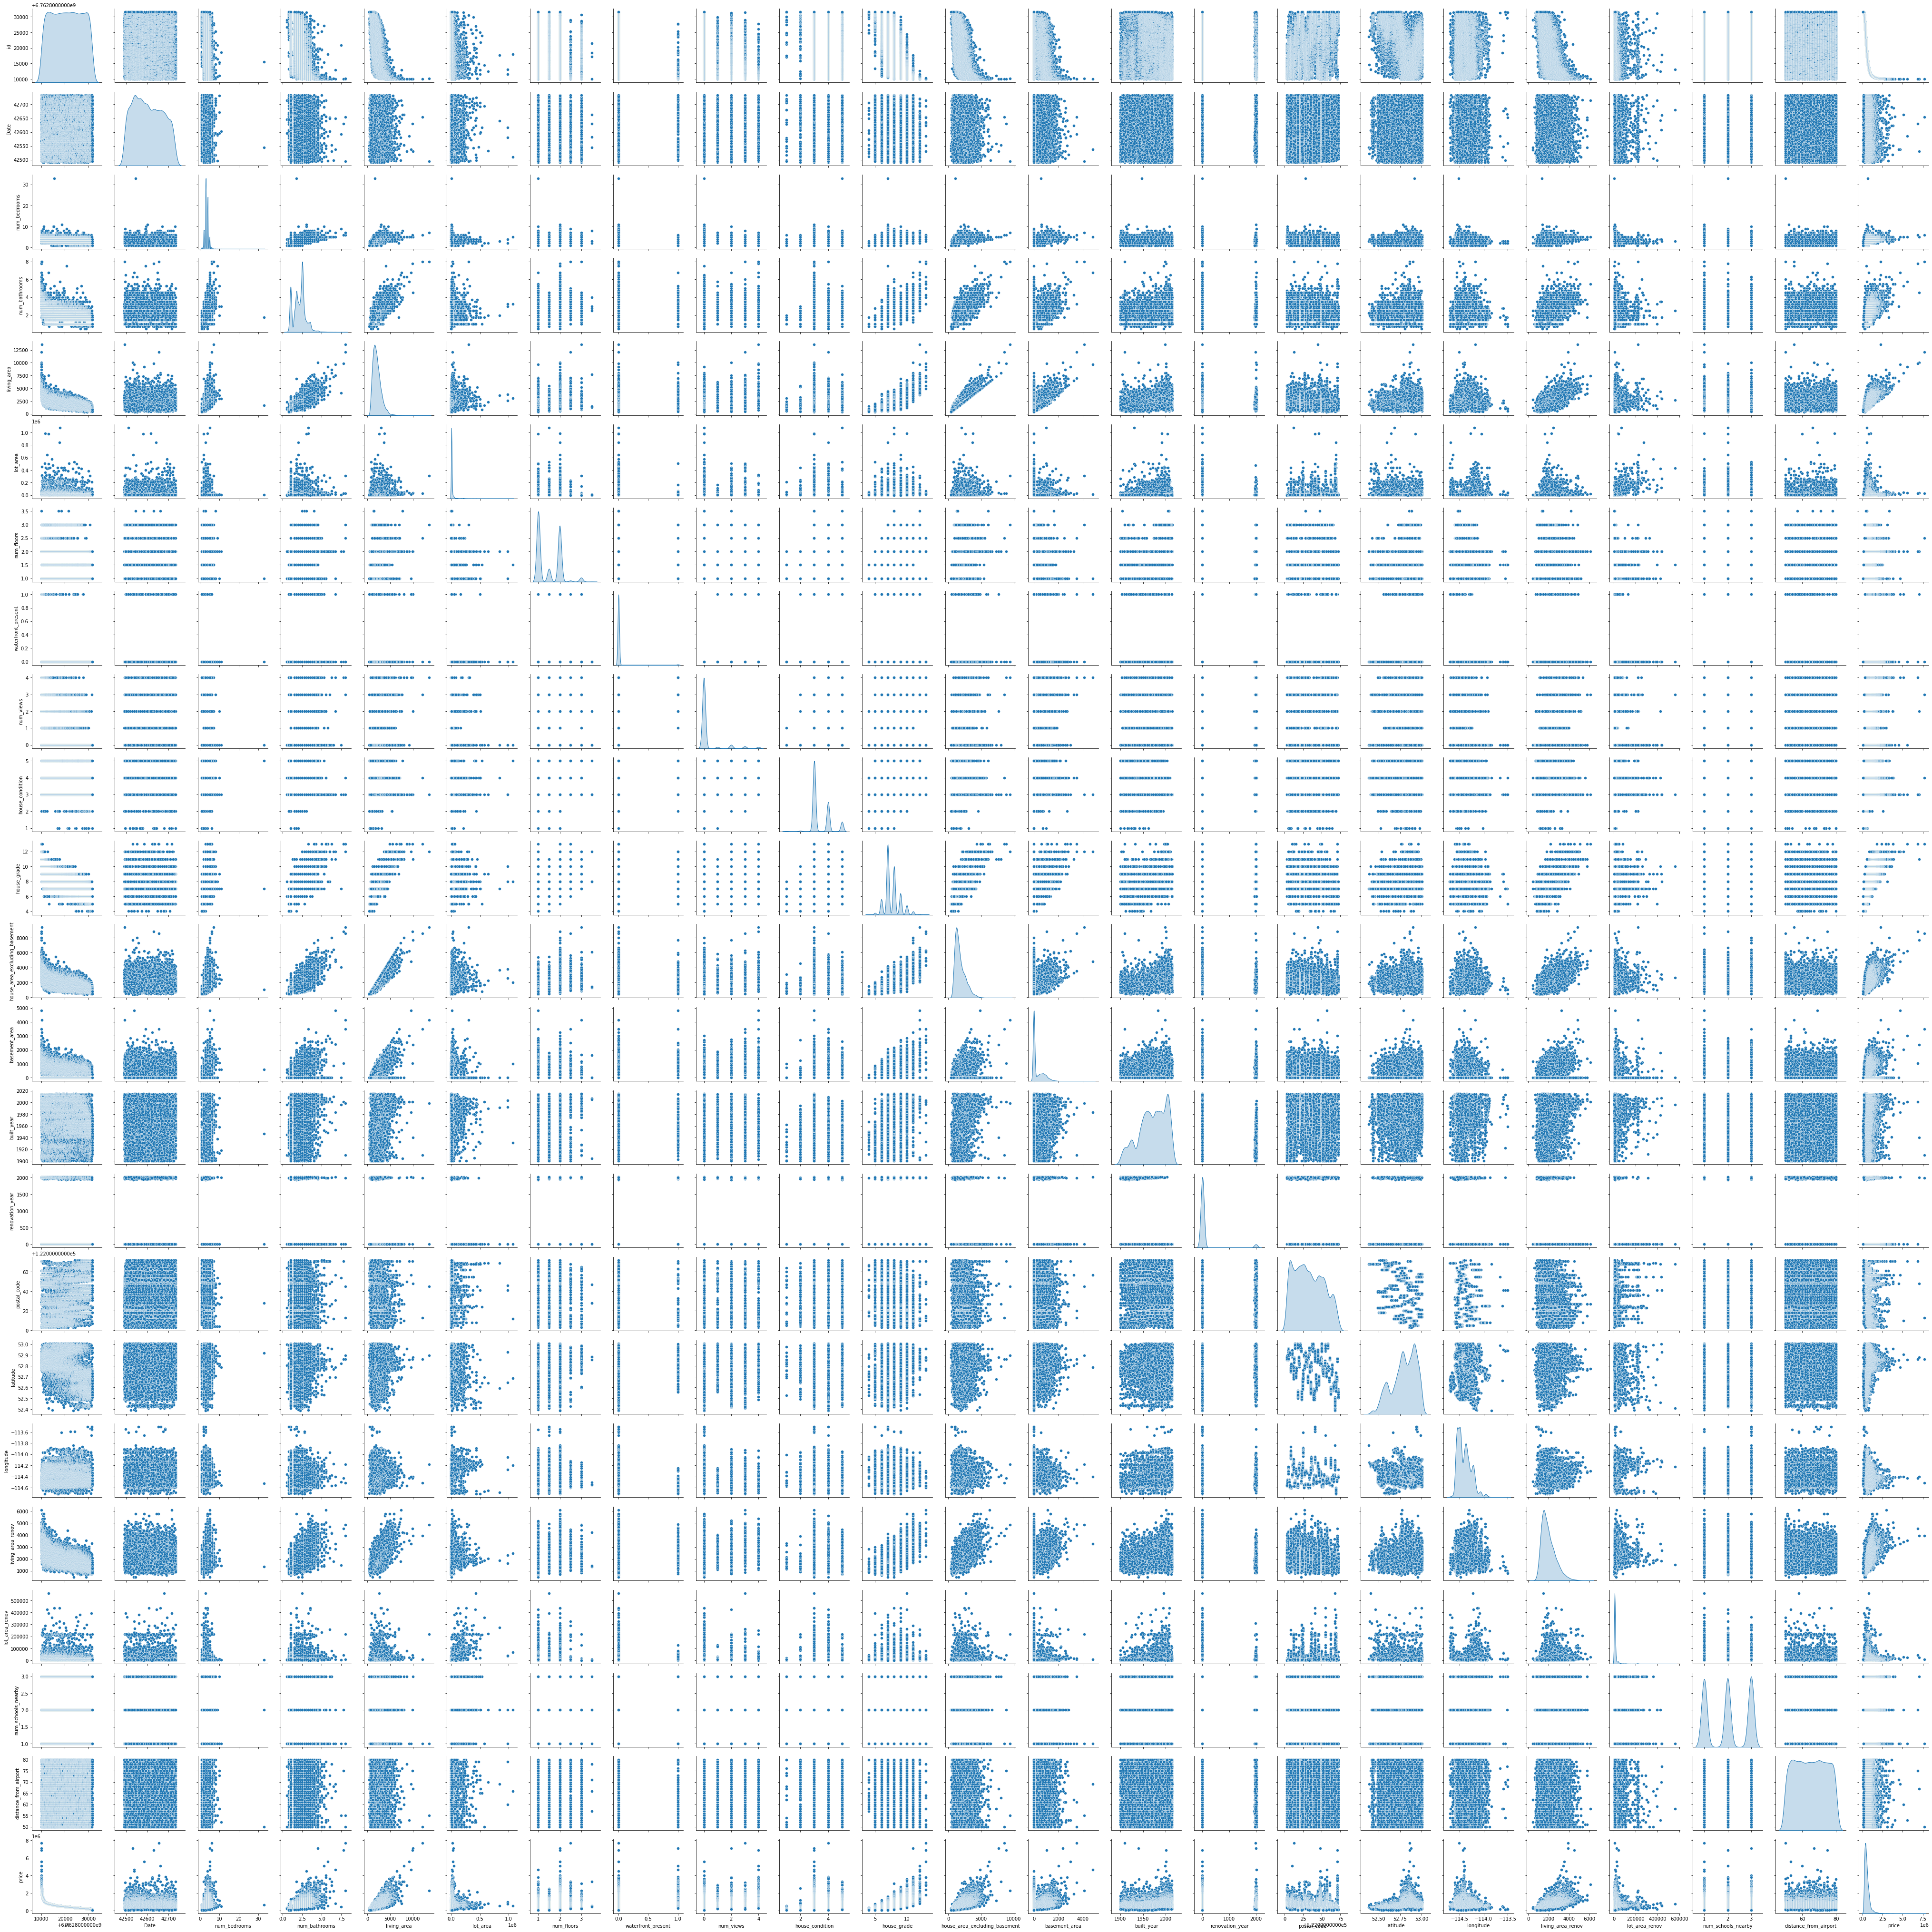

In [8]:
plt.figure(figsize=(12, 8))
sns.pairplot(dataset, diag_kind="kde")
plt.show()

- Renovation_year is not contributing to the price

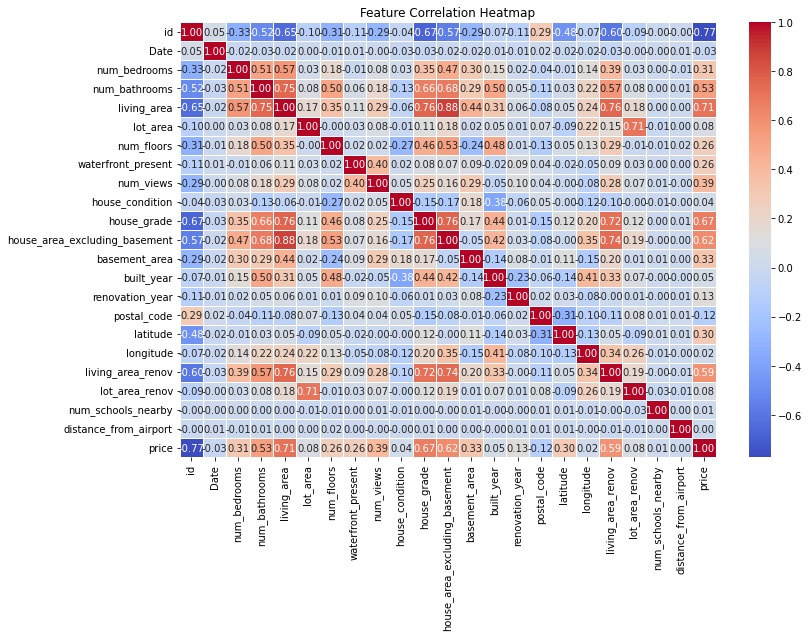

In [9]:
corr_matrix = dataset.corr(method = "pearson")
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

Less correlation with price:-
- distance_from_airport (0.00)
- num_schools_nearby (0.01)
- house_condition (0.04)
- built_year (0.05)

Correlation between features:-
- house_area_excluding_basement <-> living_area (0.88)

## Data cleaning

### 1. Dropping columns
1. id
2. Date
3. postal_code
4. distance_from_airport 
5. num_schools_nearby
6. built_year
7. house_condition
8. renovation_year
9. house_area_excluding_basement

In [10]:
dataset.drop(columns=[
    "id", "Date", "postal_code", "distance_from_airport", "num_schools_nearby", "renovation_year", "built_year", 
    "house_condition","house_area_excluding_basement"
], inplace=True)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   num_bedrooms        14619 non-null  int64  
 1   num_bathrooms       14619 non-null  float64
 2   living_area         14619 non-null  int64  
 3   lot_area            14619 non-null  int64  
 4   num_floors          14619 non-null  float64
 5   waterfront_present  14619 non-null  int64  
 6   num_views           14619 non-null  int64  
 7   house_grade         14619 non-null  int64  
 8   basement_area       14619 non-null  int64  
 9   latitude            14619 non-null  float64
 10  longitude           14619 non-null  float64
 11  living_area_renov   14619 non-null  int64  
 12  lot_area_renov      14619 non-null  int64  
 13  price               14619 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 1.6 MB


### 2. Missing values

In [12]:
dataset.isnull().sum()

num_bedrooms          0
num_bathrooms         0
living_area           0
lot_area              0
num_floors            0
waterfront_present    0
num_views             0
house_grade           0
basement_area         0
latitude              0
longitude             0
living_area_renov     0
lot_area_renov        0
price                 0
dtype: int64

- No missing values

### 3. Datatype validation

- From observations, we can see that the discrete variables (No. of bathrooms and No. of floors) have float values

In [13]:
print(dataset.dtypes[["num_bathrooms", "num_floors"]])

dataset["num_bathrooms"] = dataset["num_bathrooms"].astype(int)
dataset["num_floors"] = dataset["num_floors"].astype(int)

print(dataset.dtypes[["num_bathrooms", "num_floors"]])

num_bathrooms    float64
num_floors       float64
dtype: object
num_bathrooms    int32
num_floors       int32
dtype: object


### 4. Splitting data

In [14]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [15]:
print(X)
print(y)

[[ 6.00000e+00  8.00000e+00  1.20500e+04 ... -1.14513e+02  3.94000e+03
   8.80000e+03]
 [ 5.00000e+00  4.00000e+00  1.00400e+04 ... -1.14404e+02  3.93000e+03
   2.54490e+04]
 [ 6.00000e+00  7.00000e+00  9.89000e+03 ... -1.14430e+02  4.54000e+03
   4.27300e+04]
 ...
 [ 3.00000e+00  1.00000e+00  8.60000e+02 ... -1.14531e+02  1.14000e+03
   1.12500e+04]
 [ 1.00000e+00  0.00000e+00  4.30000e+02 ... -1.14099e+02  1.20000e+03
   7.50000e+03]
 [ 2.00000e+00  1.00000e+00  7.80000e+02 ... -1.14470e+02  1.70000e+03
   1.03870e+04]]
[7700000 7060000 6890000 ...   82000   80000   78000]


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [17]:
print(X_train)

[[ 5.00000e+00  3.00000e+00  2.44000e+03 ... -1.14193e+02  2.00000e+03
   1.05680e+04]
 [ 3.00000e+00  2.00000e+00  1.55000e+03 ... -1.14375e+02  1.62000e+03
   5.51100e+03]
 [ 3.00000e+00  3.00000e+00  1.97000e+03 ... -1.14436e+02  2.15000e+03
   1.46950e+04]
 ...
 [ 4.00000e+00  2.00000e+00  1.61300e+03 ... -1.14352e+02  1.42700e+03
   4.34100e+03]
 [ 5.00000e+00  2.00000e+00  2.50000e+03 ... -1.14301e+02  1.88000e+03
   1.87820e+04]
 [ 3.00000e+00  1.00000e+00  2.00000e+03 ... -1.14426e+02  1.06000e+03
   8.19400e+03]]


In [18]:
print(y_train)

[ 519950  481015  445000 ...  279500 1700000  237000]


### 4. Feature scaling

In [19]:
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

In [20]:
print(X_train)

[[ 1.77780438  1.67001544  0.36565104 ...  1.49205362  0.00487073
  -0.07895956]
 [-0.42362738  0.31690261 -0.59576938 ...  0.20360804 -0.54652126
  -0.28081388]
 [-0.42362738  1.67001544 -0.14206536 ... -0.2282336   0.22252546
   0.08577305]
 ...
 [ 0.6770885   0.31690261 -0.52771378 ...  0.36643358 -0.82657034
  -0.32751539]
 [ 1.77780438  0.31690261  0.4304659  ...  0.72748152 -0.16925306
   0.24890903]
 [-0.42362738 -1.03621022 -0.10965793 ... -0.15743989 -1.35909892
  -0.17371972]]


In [21]:
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test = scaler_y.transform(y_test.reshape(-1, 1))

In [22]:
print(y_train)

[[-0.0503809 ]
 [-0.15649796]
 [-0.25465658]
 ...
 [-0.70572563]
 [ 3.16583678]
 [-0.82155907]]


### 5. Outliers

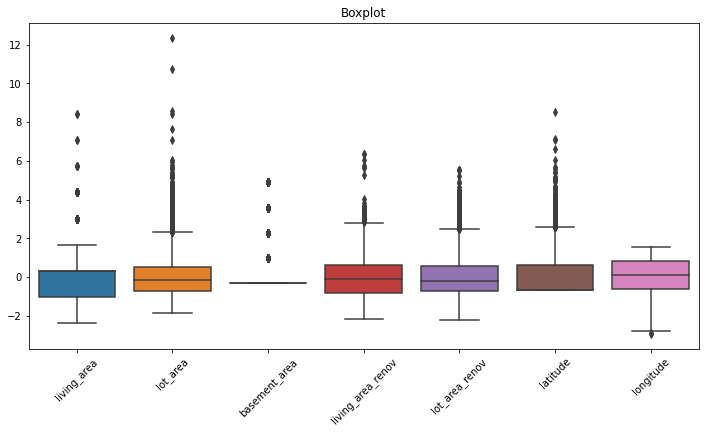

In [23]:
continuous_cols = [
    "living_area", "lot_area", "basement_area", "living_area_renov", "lot_area_renov", "latitude", "longitude"
]

X_train_df = pd.DataFrame(X_train, columns=[
    "num_bathrooms", "living_area", "lot_area", "waterfront_present",
    "num_views", "house_grade", "basement_area", "built_year",
    "latitude", "longitude", "living_area_renov", "lot_area_renov", "distance_from_airport"
])

plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train_df[continuous_cols])
plt.xticks(ticks=range(len(continuous_cols)), labels=continuous_cols, rotation=45)
plt.title("Boxplot")
plt.show()

- Although there are outliers, they are significat factors to predict the price

## Training and testing

In [24]:
def calulate_score(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("R² Score:", r2)

### 1. Multiple Linear Regression

In [25]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = regressor.predict(X_test)
calulate_score(y_test, y_pred)

Mean Absolute Error (MAE): 0.3580744430357699
Mean Squared Error (MSE): 0.3187267341434792
R² Score: 0.6839438296566979


### 2. Decision Tree

In [27]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [28]:
y_pred = regressor.predict(X_test)
calulate_score(y_test, y_pred)

Mean Absolute Error (MAE): 0.26675034724284963
Mean Squared Error (MSE): 0.22656458002661312
R² Score: 0.7753337708206962


### 3. Random Forest

In [29]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

C:\Users\YASHMI~1\AppData\Local\Temp/ipykernel_17876/1081738896.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

In [30]:
y_pred = regressor.predict(X_test)
calulate_score(y_test, y_pred)

Mean Absolute Error (MAE): 0.1851621755872169
Mean Squared Error (MSE): 0.12092118833680751
R² Score: 0.8800919922773461


### 4. XGBoost

In [31]:
regressor = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [32]:
y_pred = regressor.predict(X_test)
calulate_score(y_test, y_pred)

Mean Absolute Error (MAE): 0.18745164023171318
Mean Squared Error (MSE): 0.10816052048972281
R² Score: 0.8927457403904773


### 5. Neural network

In [33]:
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(32, activation='relu'),  # Hidden layer
    Dense(16, activation='relu'),  # Hidden layer
    Dense(1)  # Output layer
])

nn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
293/293 [==============================] - 1s 2ms/step - loss: 0.3076 - mae: 0.3455 - val_loss: 0.2928 - val_mae: 0.2998
Epoch 2/100
293/293 [==============================] - 1s 2ms/step - loss: 0.1995 - mae: 0.2783 - val_loss: 0.2868 - val_mae: 0.2766
Epoch 3/100
293/293 [==============================] - 0s 2ms/step - loss: 0.1696 - mae: 0.2517 - val_loss: 0.2491 - val_mae: 0.2526
Epoch 4/100
293/293 [==============================] - 0s 1ms/step - loss: 0.1492 - mae: 0.2354 - val_loss: 0.2065 - val_mae: 0.2401
Epoch 5/100
293/293 [==============================] - 0s 1ms/step - loss: 0.1334 - mae: 0.2237 - val_loss: 0.1933 - val_mae: 0.2283
Epoch 6/100
293/293 [==============================] - 0s 2ms/step - loss: 0.1285 - mae: 0.2182 - val_loss: 0.1884 - val_mae: 0.2314
Epoch 7/100
293/293 [==============================] - 0s 2ms/step - loss: 0.1214 - mae: 0.2121 - val_loss: 0.1871 - val_mae: 0.2230
Epoch 8/100
293/293 [==============================] - 0s 2ms/step - 

293/293 [==============================] - 0s 2ms/step - loss: 0.0626 - mae: 0.1661 - val_loss: 0.1586 - val_mae: 0.2112
Epoch 63/100
293/293 [==============================] - 0s 1ms/step - loss: 0.0546 - mae: 0.1589 - val_loss: 0.1577 - val_mae: 0.2124
Epoch 64/100
293/293 [==============================] - 0s 1ms/step - loss: 0.0539 - mae: 0.1585 - val_loss: 0.1674 - val_mae: 0.2152
Epoch 65/100
293/293 [==============================] - 0s 2ms/step - loss: 0.0547 - mae: 0.1592 - val_loss: 0.1736 - val_mae: 0.2136
Epoch 66/100
293/293 [==============================] - 0s 2ms/step - loss: 0.0542 - mae: 0.1594 - val_loss: 0.1677 - val_mae: 0.2164
Epoch 67/100
293/293 [==============================] - 0s 2ms/step - loss: 0.0563 - mae: 0.1606 - val_loss: 0.1508 - val_mae: 0.2096
Epoch 68/100
293/293 [==============================] - 0s 1ms/step - loss: 0.0542 - mae: 0.1589 - val_loss: 0.1688 - val_mae: 0.2168
Epoch 69/100
293/293 [==============================] - 0s 2ms/step - loss:

In [34]:
y_pred = nn_model.predict(X_test)
calulate_score(y_test, y_pred)

92/92 [==============================] - 0s 924us/step
Mean Absolute Error (MAE): 0.2055028644044455
Mean Squared Error (MSE): 0.125624139265001
R² Score: 0.87542844667402


## Conclusion

Steps performed:-
1. Importing data
2. Data analysis
3. Data cleaning
4. Training
5. Testing

Model trained:-
1. Multiple linear regression - 68%
2. Decision Tree - 77%
3. Random Forest - 88%
4. XGBoost - 89%
5. Neural Network - 87%

- Highest Score is produced by __XGBoost__

## Saving Model

In [35]:
with open("scaler_X.pkl", "wb") as f:
    pickle.dump(scaler_X, f)

with open("scaler_y.pkl", "wb") as f:
    pickle.dump(scaler_y, f)
    
with open("house_price_model.pkl", "wb") as f:
    pickle.dump(regressor, f)